# Bitcoin Mining and Energy Consumption in China

The cryptocurrency Bitcoin has existed since 2009, mostly in technical circles. However, recent volatility in the price of Bitcoin has vaulted it onto a national stage. Huge price increases led to media reports on the question of it is a bubble or not, and recent price decreases appear to support that trend.

An aspect of the rise of cryptocurries that has received little attention is the increase in energy consumption required to support them. Many cryptocurrie require "mining", where complex algorithms are solved to create new coins, requiring significant computing power. We ask whether or not the rise of cryptocurries has increased energy consumption.

## Methodology

In order to answer the proposed question, we will evaluate the increases of energy consumption compared to bitcoin mining statistics. China will be the country we focus on initially, as their large population and reputation for mining significant amounts of cryptocurrencies should give us complete data that can be extrapolated elsewhere. We only focus on bitcoin, since it is the largest and one of the oldest cyrpotcurrencies.

Data on Chinese energy usage comes from the KAPSARC data portal, and Bitcoin Mining statistics are collected from Quandl. We also include regional population in China from the World Bank.

## Data Import

In [1]:
# import packages needed for data analysis
import numpy as np, pandas as pd, scipy as sp, sklearn
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Pull data directly from websites
import requests
session = requests.Session()

# Create a function to loan JSON data into a pandas dataframe
def get_json(url):
    connect = session.get(url, verify=False)
    json_file = connect.json()
    
    return pd.DataFrame.from_records(json_file)

# Pull in data from KAPSARC.org for regional energy usage in China
base_url = 'https://datasource.kapsarc.org/explore/dataset/power-supply-and-consumption0/download/'
args = '?format=json&timezone=America/New_York'
ChinaEnergy = get_json(base_url+args)

# Pull data from the World Bank to get regional population in China
ChinaPop = pd.read_csv('PopulationStatistics.csv')

# Pull data from Quandl for bitcoin mining stats
import quandl
BitcoinMining = quandl.get("BITCOINWATCH/MINING", authtoken="FZZyWTNYxGywt4CHk5t1")

C:\ProgramData\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:843: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


### View imported data

In [3]:
ChinaEnergy.head()

,datasetid,fields,geometry,record_timestamp,recordid
0,power-supply-and-consumption0,{'power_consumption_yoy_growth': 7.45603306682...,NaN,2017-12-21T07:28:00-05:00,a4b3c236ada8c66e686f2f7ffc94f929555f0955
1,power-supply-and-consumption0,{'power_consumption_yoy_growth': 8.63979853572...,"{'type': 'Point', 'coordinates': [113.61355295...",2017-12-21T07:28:00-05:00,2d0627e420e3ef93c7aef47e4f37defcb09aeb6a
2,power-supply-and-consumption0,{'power_consumption_yoy_growth': 7.05039842837...,"{'type': 'Point', 'coordinates': [111.70826407...",2017-12-21T07:28:00-05:00,dbbb9447c49283993ca8a27a48f1d777c91dbc30
3,power-supply-and-consumption0,{'power_consumption_yoy_growth': 5.36816364314...,"{'type': 'Point', 'coordinates': [113.42554855...",2017-12-21T07:28:00-05:00,9f1914a0ba4231c33e2df6188a7c6833aa2e96da
4,power-supply-and-consumption0,{'power_consumption_yoy_growth': 5.22775624107...,"{'type': 'Point', 'coordinates': [108.78721054...",2017-12-21T07:28:00-05:00,e9450f753088ab43969351b662b0060c18134c18


In [4]:
ChinaPop.head()

,Series Name,Series Code,Country Name,Country Code,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,"Population, total",SP.POP.TOTL,"China, Anhui Sheng",CHN_Anhui_CN.AH_898_CHN009,62123000.0,62019000.0,62021000.0,61925000.0,60850000.0,59936000.0,60072000.0,60349000.0,60807000.0,61104000.0,61422000.0
1,"Population, total",SP.POP.TOTL,"China, Beijing Shi",CHN_Beijing_CN.BJ_899_CHN010,15842000.0,16299000.0,16842000.0,17415000.0,18684000.0,20005000.0,20538000.0,21010000.0,21419000.0,21914000.0,22427000.0
2,"Population, total",SP.POP.TOTL,"China, Chongqing Shi",CHN_Chongqing_CN.CQ_900_CHN011,28476000.0,28524000.0,28624000.0,28766000.0,28916000.0,29170000.0,29463000.0,29703000.0,29925000.0,30183000.0,30453000.0
3,"Population, total",SP.POP.TOTL,"China, Fujian Sheng",CHN_Fujian_CN.FJ_901_CHN012,36277000.0,36498000.0,36699000.0,36877000.0,37049000.0,37259000.0,37522000.0,37773000.0,38052000.0,38323000.0,38607000.0
4,"Population, total",SP.POP.TOTL,"China, Gansu Sheng",CHN_Gansu_CN.GS_902_CHN014,25864000.0,25841000.0,25810000.0,25777000.0,25751000.0,25755000.0,25834000.0,25911000.0,25970000.0,26044000.0,26126000.0


In [5]:
BitcoinMining.head()

,Total BTC,Market Cap,Transactions last 24h,Transactions avg. per hour,Bitcoins sent last 24h,Bitcoins sent avg. per hour,Count,Blocks last 24h,Blocks avg. per hour,Difficulty,Next Difficulty,Network Hashrate Terahashs,Network Hashrate PetaFLOPS
Date,,,,,,,,,,,,,
2013-08-26,11608775.0,1.406983e+09,53292.0,2220.50,641072.88,26711.37,254350.0,165.0,6.88,65750060.0,68498336.0,490.33,6227.19
2013-08-27,11612775.0,1.504095e+09,57316.0,2388.17,882731.69,36780.49,254510.0,171.0,7.13,65750060.0,70053502.0,501.46,6368.57
2013-08-28,11617025.0,1.342254e+09,66380.0,2765.83,831597.17,34649.88,254680.0,170.0,7.08,65750060.0,70879556.0,507.38,6443.67
2013-08-29,11621875.0,1.381725e+09,61617.0,2567.38,2694076.29,112253.18,254874.0,194.0,8.08,65750060.0,72700400.0,520.41,6609.20
2013-08-30,11626775.0,1.391725e+09,60440.0,2518.33,684111.74,28504.66,255070.0,196.0,8.17,65750060.0,75286537.0,538.92,6844.31


## Data Cleaning and Transformation

ChinaEnergy contains fields that are dictionary type and must be translated before they can be analyzed. ChinaPop needs to be transposed to match the grain of ChinaEnery (region, date).

In [6]:
# Split out the data fields for China regional Geography
ChinaEnergy_Data = ChinaEnergy['fields'].apply(pd.Series)
ChinaEnergy_Data = ChinaEnergy_Data.loc[:,['region','statistical_period_month','statistical_year'
                                           ,'power_consumption','power_supply'
                                           ,'latitude','longitude']]
# make year an integer
ChinaEnergy_Data['statistical_year'] = ChinaEnergy_Data['statistical_year'].apply(lambda x: int(x))

In [7]:
# Change the data so each year is it's own record
year_cols = ['2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']

all_vars = year_cols + ['Country Name']

ChinaPop_Subset = ChinaPop.loc[:,all_vars]

ChinaPop2 = pd.melt(ChinaPop_Subset, id_vars = ['Country Name'], value_vars = year_cols, value_name = 'Population')

year_parse = lambda x: int(x[0:4])
ChinaPop2['statistical_year'] = ChinaPop2['variable'].apply(year_parse)

In [8]:
# Remove text identifying of provinces (Sheng), municipalities (Shi), autonomous region (Zizhiqu), and
    # text related to the specific autonomous regions (Huizu, Zhuangzu, and Uygur).
replace = {
    'China,':' ',
    'Sheng':' ',
    'Shi':' ',
    'Zizhiqu':' ',
    'Huizu':' ',
    'Zhuangzu':' ',
    'Uygur':' '
}

# Replace the identifier with China proper with Whole Country
replace['China'] = 'Whole country'

# Replace names with other accepted names
replace['Nei Mongol'] = 'Neimenggu'
replace['Xizang'] = 'Tibet'

for k,v in replace.items():
   ChinaPop2['region'] = ChinaPop2['Country Name'].apply(lambda x: str(x).replace(k, v).strip())

ChinaPop2 = ChinaPop2.loc[:,['region','statistical_year','Population']]

In [9]:
# Add in the  population for each region to the energy data set
China = pd.merge(ChinaEnergy_Data, ChinaPop2, how='left', on=['region','statistical_year'])
China.rename(columns = {'statistical_period_month':'Month Year', 'statistical_year':'Year'}, inplace=True)
China.head()

,region,Month Year,Year,power_consumption,power_supply,latitude,longitude,Population
0,Whole country,November 2017,2017,46506.8888,49544.2000,NaN,NaN,NaN
1,Henan,November 2017,2017,2326.1128,2524.6895,NaN,NaN,NaN
2,Hunan,November 2017,2017,1152.5503,1245.4861,NaN,NaN,NaN
3,Guangdong,November 2017,2017,4960.0021,5195.9743,NaN,NaN,NaN
4,Guangxi,November 2017,2017,1095.6254,1159.7753,NaN,NaN,NaN


## Data Exploration

In order to create an accurate analysis, we first need to visualize the aspects of the data we will be using.

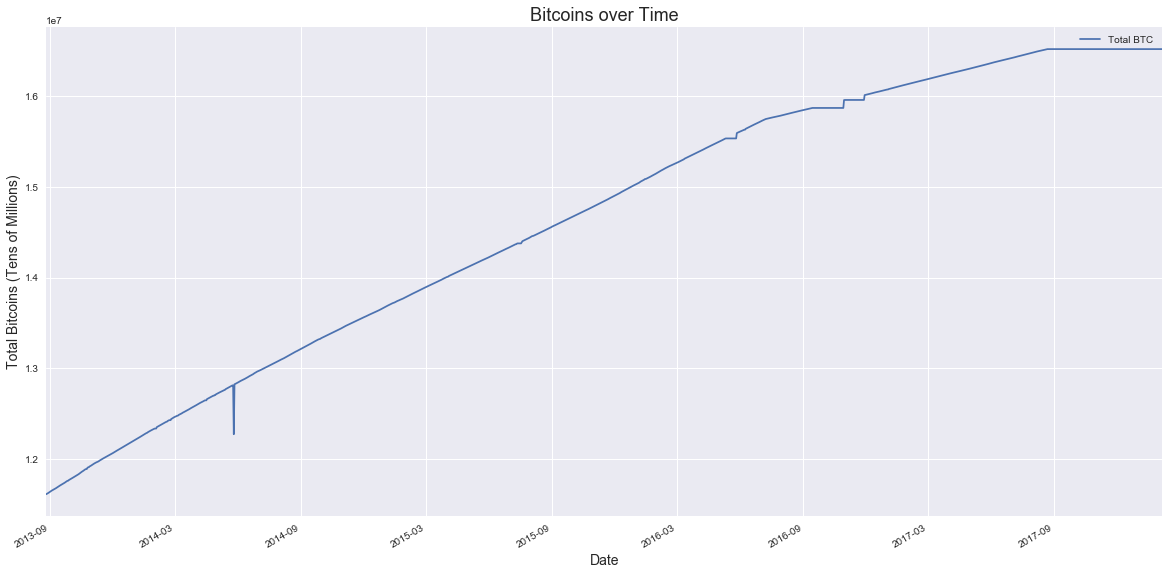

In [10]:
# view bitcoin mining and prices overtime
ax = BitcoinMining.plot(y='Total BTC', figsize = (20,10))
ax.set_title('Bitcoins over Time', fontsize = 18)
ax.set_ylabel('Total Bitcoins (Tens of Millions)', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)
plt.show()

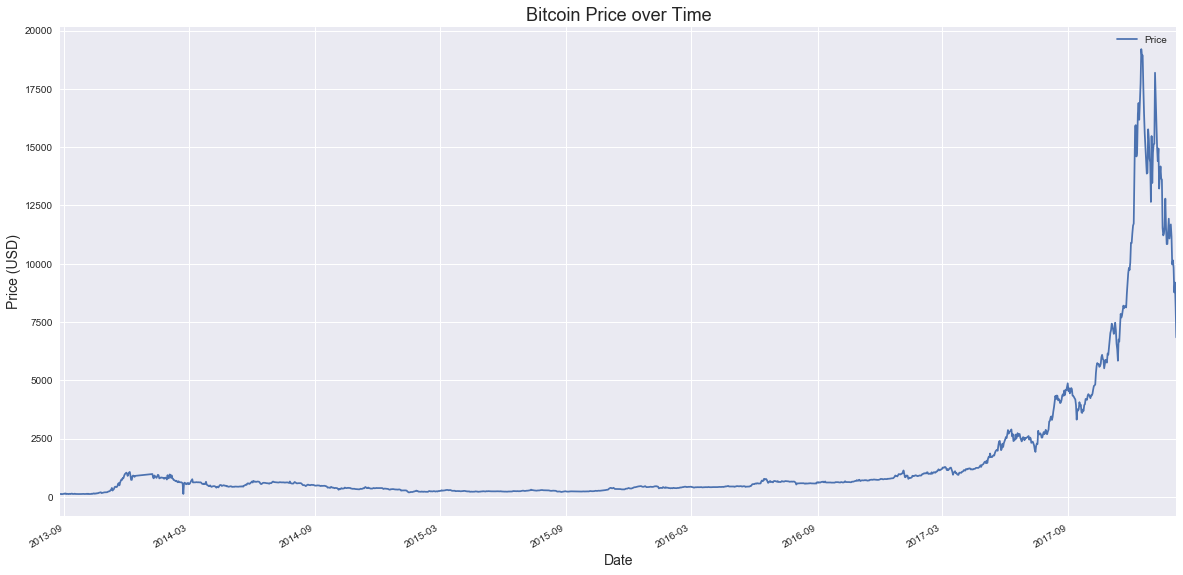

In [11]:
# Bitcoin Price over time
BitcoinMining['Price'] = BitcoinMining['Market Cap']/BitcoinMining['Total BTC']

ax = BitcoinMining.plot(y='Price', figsize = (20,10))
ax.set_title('Bitcoin Price over Time', fontsize = 18)
ax.set_ylabel('Price (USD)', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)
plt.show()

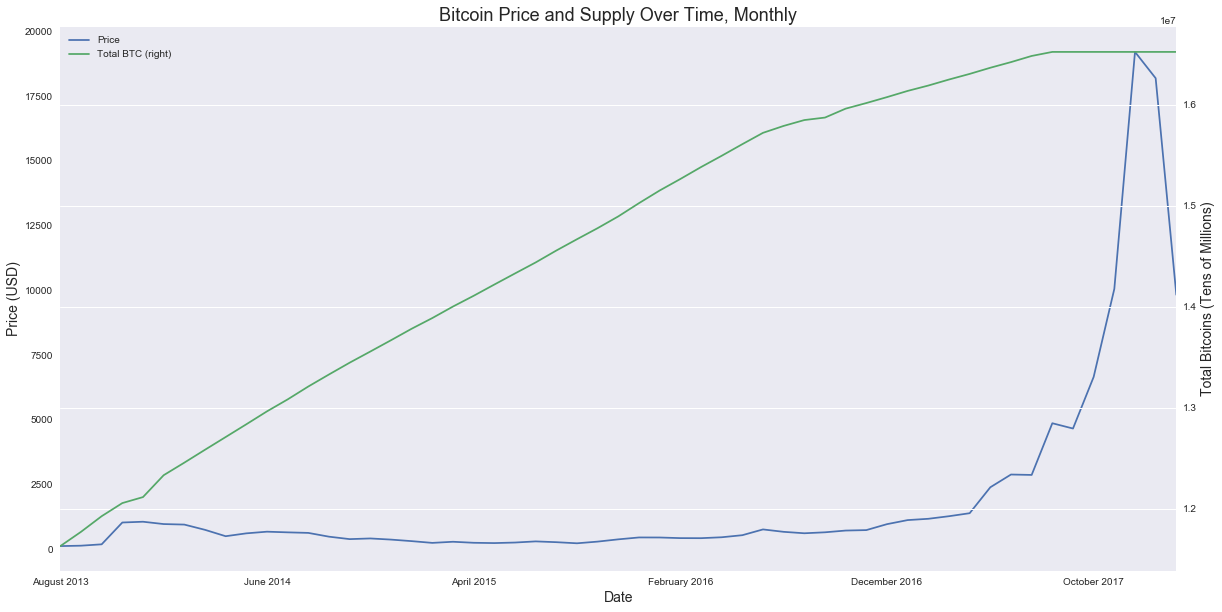

In [12]:
BitcoinMining['Month Year'] = BitcoinMining.index.to_series().apply(lambda x: x.strftime('%B')+' '+x.strftime('%Y'))
BitcoinMining['Year'] = BitcoinMining.index.to_series().apply(lambda x: int(x.strftime('%Y')))
Bitcoin = BitcoinMining.reset_index().set_index('Month Year')
Bitcoin = Bitcoin.groupby('Month Year').max()

Bitcoin.sort_values(by = 'Date', axis = 0, inplace = True)

ax = Bitcoin.plot(y='Price', figsize = (20,10))
ax2 = Bitcoin.plot(y='Total BTC', ax=ax, secondary_y = True)
ax.set_title('Bitcoin Price and Supply Over Time, Monthly', fontsize = 18)
ax.set_ylabel('Price (USD)', fontsize = 14)
ax2.set_ylabel('Total Bitcoins (Tens of Millions)', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)

plt.show()

In [13]:
# View Energy and Population over time
month_to_int = lambda x: pd.datetime.strptime(x, '%B').strftime('%m')
China['MonthNum'] = China['Month Year'].str.split(' ', expand=True)[0].apply(month_to_int)
China2 = China.set_index('Month Year')
China2.sort_values(by = ['Year','MonthNum'], axis = 0, inplace = True)
China = China2
China.head()

,region,Year,power_consumption,power_supply,latitude,longitude,Population,MonthNum
Month Year,,,,,,,,
February 2006,Beijing,2006,88.82,93.69,39.9075,116.39723,NaN,02
February 2006,Jilin,2006,50.96,52.71,43.88,125.32278,NaN,02
February 2006,Hebei,2006,203.52,209.76,38.04139,114.47861,NaN,02
February 2006,Guizhou,2006,93.39,96.33,26.58333,106.71667,NaN,02
February 2006,Qinghai,2006,30.76,32.12,36.62554,101.75739,NaN,02


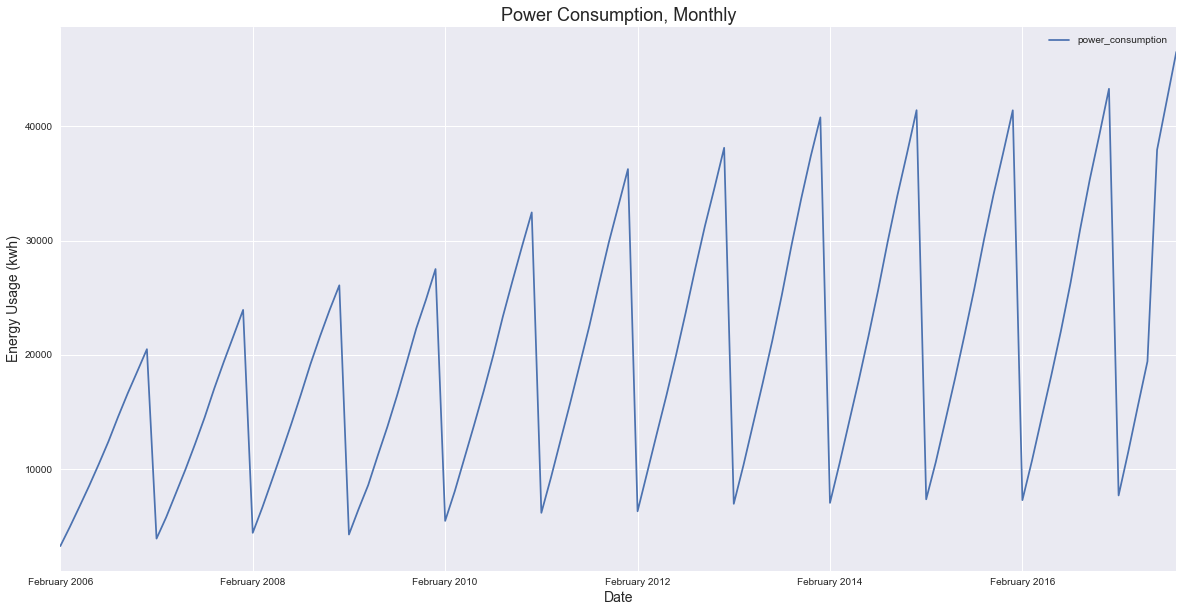

In [14]:
ax = China[China['region']=='Whole country'].plot(y='power_consumption', figsize = (20,10))
ax.set_title('Power Consumption, Monthly', fontsize = 18)
ax.set_ylabel('Energy Usage (kwh)', fontsize = 14)
ax.set_xlabel('Date', fontsize = 14)

plt.show()

## Hypothesis Testing

Based on our exploration of the data, we can see the supply ot bitcoin began to level out sometime in 2016. Since our monthly consumption only goes to the end of 2016, we will look at pre-2016 vs post 2016 to see if our hypothesis is correct. If it is, we should see energy useage decrease around the same time bitcoin begins to level out.

In [15]:
X1_China = China[np.logical_and(China['Year'] < 2016,China['region']=='Whole country')]['power_consumption']
X2_China = China[np.logical_and(China['Year'] >= 2016,China['region']=='Whole country')]['power_consumption']

X1_Bitcoin = Bitcoin[Bitcoin['Year'] < 2016]['Total BTC']
X2_Bitcoin = Bitcoin[Bitcoin['Year'] >= 2016]['Total BTC']

In [16]:
import scipy.stats as stats

# Test for China First
mean1, mean2 = X1_China.mean(), X2_China.mean()
var1, var2 = X1_China.var(), X2_China.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


stats.ttest_ind(X1_China, X2_China, equal_var=False)

mean1=18954.320144, mean2=25210.800718
variance1=102837553.963228, variance2=180798722.338125


Ttest_indResult(statistic=-1.8319511727282769, pvalue=0.082506283782946291)

In [17]:
# Test for Bitcoin Next
mean1, mean2 = X1_Bitcoin.mean(), X2_Bitcoin.mean()
var1, var2 = X1_Bitcoin.var(), X2_Bitcoin.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

stats.ttest_ind(X1_Bitcoin, X2_Bitcoin, equal_var=False)

mean1=13393148.275862, mean2=16077025.153846
variance1=1031885780398.707153, variance2=189243614116.055359


Ttest_indResult(statistic=-12.96379347295186, pvalue=1.1093630650258338e-15)

## Conclusion

As shown by the results of the T-test, the result for the difference in energy consumption is not significant, which allows us to reject the null hypothesis that each population is different. Therefore our original hypothesis cannot be verified with this test alone. However, it appears our population for Bitcoin does show a significant p-value less than 0.05, so our assumption that bitcoin supply changes are different after vs before 2016 appears valid. However, since this is a time series, futher tests should be completed. This analysis is also overly-simplistic, but allows us to show the steps needed to perform hypothesis testing.